# AI Application Development Project AI Modelling By Sai Keerthan

Jun Ming and Sai have decided to split up the Machine Learning workload, where we will be training 2 models each, I have decided to train 

- XGBoost & Logistic Regression

Whereas Jun Ming will be training 
- LightGBM & Random Forest

## Understanding Dataset

### Loading the Master Dataset, which was done by Xiu Wen and Richie

In [1]:
import sys, os

cwd = os.getcwd()
print(f"Current Working Directory: {cwd}")

Current Working Directory: /Users/saikeerthan/NYP-AI/Year3/Ai_Solution_Development/Sai_Project


### Import Libraries

Mostly importing pandas, numpy, seaborn and scikit-learn for Model training and Model Evaluation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

### Import Master Dataset

In [3]:
df = pd.read_csv(os.path.join(cwd, "master_dataset.csv"))

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares


### Inspect Dataset

In [4]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_city',
       'geolocation_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')


#### description

**Description of the Columns**

1. order_id: Unique identifier for each customer order (one order can have multiple items).

2. customer_id: Unique identifier for each customer (a customer may place multiple orders).

3. order_status: Current status of the order (e.g., delivered, shipped, canceled, refunded).

4. order_purchase_timestamp: Timestamp when the order was placed by the customer.

5. order_approved_at: Timestamp when the payment was approved for the order.

6. order_delivered_carrier_date: Date when the order was handed over to the logistics carrier.

7. order_delivered_customer_date: Date when the order was actually delivered to the customer.

8. order_estimated_delivery_date: Estimated date the order was expected to be delivered to the customer.

9. customer_unique_id: A unique identifier assigned to each customer profile to track repeat buyers (different from customer_id which is order-specific).

10. customer_zip_code_prefix: The first few digits of the customer's zip/postal code, representing geographic region.

11. customer_city: City where the customer is located.

12. customer_state: State where the customer is located.

13. geolocation_zip_code_prefix: Zip code prefix used for mapping geographic locations.

14. geolocation_city: City corresponding to the geolocation zip code prefix.

15. geolocation_state: State corresponding to the geolocation zip code prefix.

16. order_item_id: Identifier for the individual item within an order (e.g., item 1, item 2 in the same order).

17. product_id: Unique identifier for each product sold on the platform.

18. seller_id: Unique identifier for the seller supplying the product.

19. shipping_limit_date: Deadline date by which the seller must ship the product to meet delivery expectations.

20. price: Price of the product item in the order.

21. freight_value: Shipping or freight cost charged for the product item.

22. payment_sequential: Sequence number for payment attempts related to an order (e.g., 1 for first payment attempt).

23. payment_type: Method of payment used (e.g., credit card, boleto, voucher).

24. payment_installments: Number of installments the payment is split into.

25. payment_value: Total amount paid for the order or installment.

26. review_id: Unique identifier for the customer review left for the order/item.

27. review_score: Customer rating for the order/item (usually 1 to 5 stars).

28. review_creation_date: Date when the review was created by the customer.

29. review_answer_timestamp: Timestamp when the seller or platform responded to the review.

30. product_category_name: Category of the product in Portuguese (original dataset language).

31. product_photos_qty: Number of photos available for the product.

32. product_weight_g: Weight of the product in grams.

33. product_length_cm: Length of the product in centimeters.

34. product_height_cm: Height of the product in centimeters.

35. product_width_cm: Width of the product in centimeters.

36. product_category_name_english: Product category translated to English.

37. seller_zip_code_prefix: Zip code prefix of the seller's location.

38. seller_city: City where the seller is located.

39. seller_state: State where the seller is located


### Display shape and size of the Df

In [5]:
print(f"Shape of the Dataset: {df.shape}")
print(f"Size of the Dataset: {df.size}")

Shape of the Dataset: (173594, 39)
Size of the Dataset: 6770166


### Check for Missing Values

In [6]:
df_missing = df.isnull().sum()

print(df_missing[df_missing > 0]) # only print the missing columns

geolocation_zip_code_prefix       303
geolocation_city                  303
geolocation_state                 303
payment_sequential                  6
payment_type                        6
payment_installments                6
payment_value                       6
review_id                        1307
review_score                     1307
review_creation_date             1307
review_answer_timestamp          1307
product_category_name            2468
product_photos_qty               2468
product_weight_g                   26
product_length_cm                  26
product_height_cm                  26
product_width_cm                   26
product_category_name_english    2501
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173594 entries, 0 to 173593
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       173594 non-null  object 
 1   customer_id                    173594 non-null  object 
 2   order_status                   173594 non-null  object 
 3   order_purchase_timestamp       173594 non-null  object 
 4   order_approved_at              173594 non-null  object 
 5   order_delivered_carrier_date   173594 non-null  object 
 6   order_delivered_customer_date  173594 non-null  object 
 7   order_estimated_delivery_date  173594 non-null  object 
 8   customer_unique_id             173594 non-null  object 
 9   customer_zip_code_prefix       173594 non-null  int64  
 10  customer_city                  173594 non-null  object 
 11  customer_state                 173594 non-null  object 
 12  geolocation_zip_code_prefix   

In [8]:
# DType of some important columns

imp_columns = ['order_id', 'customer_id', 'customer_unique_id']
for col in imp_columns:
    print(f"Column: {col}, DType: {df[col].dtype}")

Column: order_id, DType: object
Column: customer_id, DType: object
Column: customer_unique_id, DType: object


### Create a new column called "Repeat Buyers"

This is because in order to train the ML model efficiently, we need a column for the repeated buyers, however, our current dataset lacks that column, and as a result, if we were to feed this direct dataset into the model, the Model may not be able to learn effectively. Therefore, using our business logic, we will be creating a Repeat Buyer column where the ML model can learn from and predict accurately. 

This is done by examining the customers with more than one unique order, and will then be grouped into one column

In [9]:
# creating the repeat buyer column which is the target variable for the model 
customer_orders = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_orders['repeat_customer'] = (customer_orders['order_id'] > 1).astype(int) 

# merging the column with the original dataset
df = df.merge(customer_orders[['customer_unique_id', 'repeat_customer']], on='customer_unique_id', how='left')

print(df["repeat_customer"].value_counts()) # checking the class distribution of the target variable


repeat_customer
0    161117
1     12477
Name: count, dtype: int64


In [10]:
# seeing the dataset as a whole

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,repeat_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,1
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,1
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,1
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173589,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories,0
173590,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories,0
173591,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories,0
173592,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories,0


### Visualiation of the Target Variable

In [11]:
import plotly.express as px

fig = px.histogram(df, x="repeat_customer", title="Distribution of Repeat Customers")
fig.update_layout(xaxis_title="Repeat Customer", yaxis_title="Count")
fig.show()

## Feature Engineering 

### Feature Aggregation

In [ ]:
# ensure consistency with the datetime format across dataset

print("Format before conversion:")
print(df['order_purchase_timestamp'].dtype)

df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

print("Format after conversion:")
print(df['order_purchase_timestamp'].dtype)


Format before conversion:
object
Format after conversion:
datetime64[ns]


Format before conversion:
object


KeyboardInterrupt: 

In [ ]:
# Aggregating the dataset to get the total number of orders, total sales, and average order value per customer

aggregated_df = df.groupby('customer_unique_id').agg({
    "order_id": "nunique",
    "order_item_id": "count",
    "price": "sum",
    "payment_value": "sum",
    "payment_type": lambda x: x.mode()[0] if not x.mode().empty else None, # extracts the most common payment type
    "review_score": "mean",
    "customer_city": lambda x: x.mode()[0],
    "customer_state": lambda x: x.mode()[0],
    "order_purchase_timestamp": ['min', 'max', 'nunique'],
    "repeat_customer": "first"
})

aggregated_df.columns = ['_'.join(col).strip("_") for col in aggregated_df.columns.values]

customer_features = aggregated_df.rename(columns={
    'order_id_nunique': 'total_orders',
    'order_item_id_count': 'total_items',
    'price_sum': 'total_spend',
    'payment_value_sum': 'total_payment',
    'payment_type_<lambda>': 'most_freq_payment_type',
    'review_score_mean': 'avg_review_score',
    'customer_city_<lambda>': 'city',
    'customer_state_<lambda>': 'state',
    'order_purchase_timestamp_min': 'first_purchase',
    'order_purchase_timestamp_max': 'last_purchase',
    'order_purchase_timestamp_nunique': 'active_months',
    'repeat_customer': 'repeat_customer'
})


In [ ]:
# calculating the days since last purchase

latest_date = df['order_purchase_timestamp'].max()
customer_features['recency_days'] = (latest_date - customer_features['last_purchase']).dt.days

customer_features = customer_features.reset_index()
display(customer_features.head())

,customer_unique_id,total_orders,total_items,total_spend,total_payment,most_freq_payment_type,avg_review_score,city,state,first_purchase,last_purchase,active_months,repeat_customer_first,recency_days
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2,259.80,283.80,credit_card,5.0,cajamar,SP,2018-05-10 10:56:27,2018-05-10 10:56:27,1,0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,18.90,27.19,credit_card,4.0,osasco,SP,2018-05-07 11:11:27,2018-05-07 11:11:27,1,0,114
2,0000f46a3911fa3c0805444483337064,1,2,138.00,172.44,credit_card,3.0,sao jose,SC,2017-03-10 21:05:03,2017-03-10 21:05:03,1,0,536
3,0000f6ccb0745a6a4b88665a16c9f078,1,2,51.98,87.24,credit_card,4.0,belem,PA,2017-10-12 20:29:41,2017-10-12 20:29:41,1,0,320
4,0004aac84e0df4da2b147fca70cf8255,1,1,180.00,196.89,credit_card,5.0,sorocaba,SP,2017-11-14 19:45:42,2017-11-14 19:45:42,1,0,287


### Encoding Categorical Columns for ML Models using one hot encoding

In [ ]:
feature_columns = [
    'total_orders', 'total_items', 'total_spend', 'total_payment', 'avg_review_score',
    'active_months', 'recency_days', 'most_freq_payment_type', 'city', 'state'
]

In [ ]:
# One-hot encode categorical features (drop first to avoid collinearity)
customer_model_data = pd.get_dummies(
    customer_features[feature_columns + ['repeat_customer_first']], 
    columns=['most_freq_payment_type', 'city', 'state'], 
    drop_first=True
)

display(customer_model_data.head())

,total_orders,total_items,total_spend,total_payment,avg_review_score,active_months,recency_days,repeat_customer_first,most_freq_payment_type_credit_card,most_freq_payment_type_debit_card,...,state_PR,state_RJ,state_RN,state_RO,state_RR,state_RS,state_SC,state_SE,state_SP,state_TO
0,1,2,259.80,283.80,5.0,1,111,0,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,18.90,27.19,4.0,1,114,0,True,False,...,False,False,False,False,False,False,False,False,True,False
2,1,2,138.00,172.44,3.0,1,536,0,True,False,...,False,False,False,False,False,False,True,False,False,False
3,1,2,51.98,87.24,4.0,1,320,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,180.00,196.89,5.0,1,287,0,True,False,...,False,False,False,False,False,False,False,False,True,False


### Splitting it into Train Test Val

In [ ]:
X = customer_model_data.drop(columns=['repeat_customer_first'], axis=1)
y = customer_model_data['repeat_customer_first']

# split them through stratified split to keep class balance in both sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)


once we have split the dataset, it is now the time for training the model

## Model Training: Logistic Regression Model

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Check which columns have missing values
null_count = X_train.isnull().sum()
print(null_count[null_count > 0])


avg_review_score    478
dtype: int64


In [ ]:
columns_numeric = X_train.select_dtypes(include=['int64', 'float64']).columns
si = SimpleImputer(strategy='median')
X_train[columns_numeric] = si.fit_transform(X_train[columns_numeric])
X_val[columns_numeric] = si.transform(X_val[columns_numeric])
X_test[columns_numeric] = si.transform(X_test[columns_numeric])

# imputing the categorical columns with the most frequent value 

columns_categorical = X_train.select_dtypes(include=['object']).columns
si = SimpleImputer(strategy='most_frequent')

if len(columns_categorical) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_train[columns_categorical] = si.fit_transform(X_train[columns_categorical])
    X_val[columns_categorical] = si.transform(X_val[columns_categorical])
    X_test[columns_categorical] = si.transform(X_test[columns_categorical])



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# fitting scalar on training data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# hyperparameter tuning

# parameter_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

In [ ]:
# incorporating GridSearchCV for hyperparameter tuning with Logistic Regression
lg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
# lg_model = GridSearchCV(lg_model, parameter_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# lg_model.fit(X_train_scaled, y_train)

lg_model.fit(X_train_scaled, y_train)

# print("Best Hyperparameters: ", grid_lg_model.best_params_)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Prediction on Validation & Test Set

y_val_preds = lg_model.predict(X_val_scaled)
y_test_preds = lg_model.predict(X_test_scaled)
y_test_probs = lg_model.predict_proba(X_test_scaled)[:, 1]

# Print out the Evaluation Metrics
print("Validation Set Metrics & Classification Report:")
print(f"Classification Report:\n{classification_report(y_val, y_val_preds)}")
print("----------------")
print("Test Set Metrics & Classification Report:")
print(f"Test ROC-AUC:\n{roc_auc_score(y_test, y_test_preds)}")

Validation Set Metrics & Classification Report:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9054
           1       1.00      1.00      1.00       280

    accuracy                           1.00      9334
   macro avg       1.00      1.00      1.00      9334
weighted avg       1.00      1.00      1.00      9334

----------------
Test Set Metrics & Classification Report:
Test ROC-AUC:
0.9997791275538376


The model's scores are near-perfect which is a bit suspicious, therefore we will be re-engineering the dataset to make it more "fair" such that the model does not learn on the surface(customer buys more than once = repeat buyer).

### Re-Engineer Dataset

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Sort by customer and order time
df_sorted = df.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# Get FIRST order per customer
first_orders = df_sorted.groupby('customer_unique_id').first().reset_index()

In [ ]:
# Count unique orders per customer
order_counts = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
order_counts['is_repeat_buyer'] = (order_counts['order_id'] > 1).astype(int)

# Merge the repeat buyer label into first order records
first_orders = first_orders.merge(order_counts[['customer_unique_id', 'is_repeat_buyer']], 
                                 on='customer_unique_id', how='left')


In [ ]:
# Example feature selection — adapt as you see fit!
feature_cols = [
    'price',                # Spend for this order
    'payment_value',        # What customer paid
    'freight_value',        # Shipping cost
    'payment_type',         # Categorical
    'review_score',         # Only if review comes right after purchase!
    'customer_city',
    'customer_state',
    'order_purchase_timestamp'   # We can extract date/time features from this
]
target_col = 'is_repeat_buyer'

model_data = first_orders[feature_cols + [target_col]].copy()


In [ ]:
# Extract features from datetime (like day of week, month, hour)
model_data['order_month'] = model_data['order_purchase_timestamp'].dt.month
model_data['order_dayofweek'] = model_data['order_purchase_timestamp'].dt.dayofweek
model_data['order_hour'] = model_data['order_purchase_timestamp'].dt.hour

# Drop raw timestamp (not usable directly)
model_data = model_data.drop(columns=['order_purchase_timestamp'])


In [ ]:
model_data = pd.get_dummies(
    model_data, 
    columns=['payment_type', 'customer_city', 'customer_state'], 
    drop_first=True
)


In [ ]:
from sklearn.impute import SimpleImputer

# Impute numerics with median
num_cols = model_data.select_dtypes(include=['float64', 'int64']).columns.drop(target_col)
imputer = SimpleImputer(strategy='median')
model_data[num_cols] = imputer.fit_transform(model_data[num_cols])


### Train LogisticRegression with "Fairer" Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = model_data.drop(columns=[target_col])
y = model_data[target_col]

# Train (80%), Val (10%), Test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict
val_preds = logreg.predict(X_val_scaled)
test_preds = logreg.predict(X_test_scaled)
test_probs = logreg.predict_proba(X_test_scaled)[:, 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print Classification Report
print("Validation Classification Report:")
print(classification_report(y_val, val_preds, digits=3))

print("Test Classification Report:")
print(classification_report(y_test, test_preds, digits=3))

print("Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs)))


Validation Classification Report:
              precision    recall  f1-score   support

           0      0.972     0.548     0.701      9054
           1      0.032     0.486     0.060       280

    accuracy                          0.546      9334
   macro avg      0.502     0.517     0.380      9334
weighted avg      0.944     0.546     0.681      9334

Test Classification Report:
              precision    recall  f1-score   support

           0      0.970     0.547     0.700      9055
           1      0.030     0.454     0.056       280

    accuracy                          0.545      9335
   macro avg      0.500     0.501     0.378      9335
weighted avg      0.942     0.545     0.681      9335

Test ROC-AUC: 0.492


In [ ]:
# import plotly.figure_factory as ff
# import numpy as np

# z = cm
# x = labels
# y = labels

# fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Blues', showscale=True)
# fig.update_layout(title='Confusion Matrix (Test Set) - Plotly', xaxis_title='Predicted', yaxis_title='Actual')
# fig.show()


NameError: name 'cm' is not defined

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Get the classification report as a dict
report = classification_report(y_test, test_preds, output_dict=True)
report_df = pd.DataFrame(report).transpose()
class_labels = ['0', '1']

fig = go.Figure()

for metric in ['precision', 'recall', 'f1-score']:
    fig.add_trace(go.Bar(
        x=class_labels,
        y=report_df.loc[class_labels, metric],
        name=metric
    ))

fig.update_layout(
    title='Classification Report Metrics per Class (Test Set)',
    xaxis=dict(title='Class Label'),
    yaxis=dict(title='Score'),
    barmode='group'
)
fig.show()


The dataset's classes are imbalanced, and as a result the model with the "fairer" dataset is unable to learn effectively and is producing lower accuracy as compaared to the first model with the initial dataset. In order to tackle the class imbalance, we will be trying SMOTE, which helps with the class imbalance.

### SMOTE: Helping with the Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Original class distribution in training set:\n", pd.Series(y_train).value_counts())
print("Resampled class distribution in training set:\n", pd.Series(y_train_resampled).value_counts())

Original class distribution in training set:
 is_repeat_buyer
0    72433
1     2240
Name: count, dtype: int64
Resampled class distribution in training set:
 is_repeat_buyer
0    72433
1    72433
Name: count, dtype: int64


From above, we can see now that the class is balanced, which may improve the Model's learning and inference from the new balanced tensors

In [ ]:
lg_smote = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lg_smote.fit(X_train_resampled, y_train_resampled) # fit the model on the resampled data

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Predict and Evaluate on the test and the validation set 

val_preds_smote = lg_smote.predict(X_val_scaled)
test_preds_smote = lg_smote.predict(X_test_scaled)
test_probs_smote = lg_smote.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("SMOTE Validation Classification Report:")
print("\n")
print(classification_report(y_val, val_preds_smote, digits=3))
print("-----------------")
print("SMOTE Test Classification Report:")
print("\n")
print(classification_report(y_test, test_preds_smote, digits=3))
print("\n")
print("SMOTE Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs_smote))) 

SMOTE Validation Classification Report:


              precision    recall  f1-score   support

           0      0.973     0.555     0.707      9054
           1      0.034     0.500     0.063       280

    accuracy                          0.554      9334
   macro avg      0.503     0.528     0.385      9334
weighted avg      0.945     0.554     0.688      9334

-----------------
SMOTE Test Classification Report:


              precision    recall  f1-score   support

           0      0.972     0.555     0.707      9055
           1      0.033     0.489     0.062       280

    accuracy                          0.554      9335
   macro avg      0.503     0.522     0.384      9335
weighted avg      0.944     0.554     0.688      9335



SMOTE Test ROC-AUC: 0.496


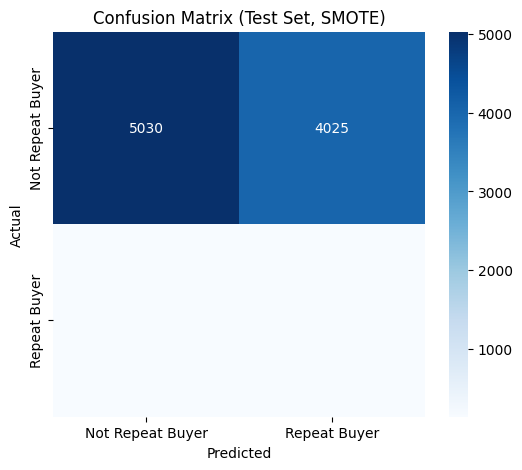

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, test_preds_smote)
labels = ['Not Repeat Buyer', 'Repeat Buyer']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Test Set, SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


we have trained Logistic Regression with SMOTE, trying to balance both the classes, but we still find that Logistic Regression is weak and unable to predict accurately, even though the ROC-AUC has increased by 4%, we will now move onto XGBoost, which is a tree based model which can hopefully predict better results. 

## Model Training: XGBoost Model (Tree-Based)

### Import Libraries for XGBoost Training

In [ ]:
import xgboost as xgb

### Import Data

In [ ]:
df = pd.read_csv(os.path.join(cwd, "master_dataset.csv"))

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173589,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
173590,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
173591,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
173592,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories


### Data Pre-Processing

**Our Plan for Data Pre-Processing is:**
- For every unique customer ID in the dataset, we will label them as a repeat buyer if they have more than one unique order ID. Then proceed to create a column so that the model is able to learn from the column and predict accurately. 
- Aggregate per customer, preventing any sort of Data Leakage, for example, if the customer only has one OrderID, the column will represent 0, and otherwise 1. 
- Proceed with detailed feature engineering, using feature known at the first purchase.
- One Hot Encode the Categorical Variables
- Proceed with the Model Training.

In [ ]:
# create the label for the repeat buyers

number_of_orders = df.groupby('customer_unique_id')['order_id'].nunique().reset_index() 
number_of_orders['repeat_buyer'] = (number_of_orders['order_id'] > 1).astype(int)

In [ ]:
# take the first order per customer for features 

first_orders = df.sort_values('order_purchase_timestamp').groupby('customer_unique_id').first().reset_index()
first_orders = first_orders.merge(number_of_orders[['customer_unique_id', 'repeat_buyer']], on='customer_unique_id', how='left')

In [ ]:
first_orders["order_purchase_timestamp"] = pd.to_datetime(first_orders["order_purchase_timestamp"])
# Feature Engineering 
first_orders["order_month"] = first_orders["order_purchase_timestamp"].dt.month
first_orders["order_dayofweek"] = first_orders["order_purchase_timestamp"].dt.dayofweek
first_orders["order_hour"] = first_orders["order_purchase_timestamp"].dt.hour

first_orders["price_bucket"] = pd.cut(first_orders["price"], bins=[0, 50, 100, 150, 200], labels=[0, 1, 2, 3,])

In [ ]:
# Fill Missing Values for numerics 

number_of_columns = ['price', 'freight_value', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_installments', 'product_photos_qty']

for col in number_of_columns:
    first_orders[col].fillna(first_orders[col].median())  

In [ ]:
# Reduce cardinality for categorical features
top_cities = first_orders['customer_city'].value_counts().nlargest(10).index
first_orders['customer_city'] = first_orders['customer_city'].where(first_orders['customer_city'].isin(top_cities), 'other')

In [ ]:
# 4. Select features for modeling
feature_cols = [
    'price', 'freight_value', 'payment_value', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'payment_installments', 'product_photos_qty',
    'order_month', 'order_dayofweek', 'order_hour', 'price_bucket',
    'payment_type', 'product_category_name_english', 'customer_city', 'customer_state'
]

model_data = first_orders[feature_cols + ['repeat_buyer']]

In [ ]:
# 5. One-hot encode categoricals
cat_to_encode = ['price_bucket', 'payment_type', 'product_category_name_english', 'customer_city', 'customer_state']
model_data = pd.get_dummies(model_data, columns=cat_to_encode, drop_first=True)

### XGBoost Model Training:

In [ ]:
X = model_data.drop(columns=['repeat_buyer'])
y = model_data['repeat_buyer']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Scale features 
number_of_features = X_train.select_dtypes(include=['int64', 'float64']).columns
ss = StandardScaler()
X_train[number_of_features] = ss.fit_transform(X_train[number_of_features])
X_val[number_of_features] = ss.transform(X_val[number_of_features])
X_test[number_of_features] - ss.transform(X_test[number_of_features])

,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_installments,product_photos_qty
88373,40.350653,17.001836,57.162691,441.440466,16.875552,16.035497,12.937810,4.217696,4.289953
90990,90.089019,19.841608,219.149858,950.305160,53.448199,11.411529,12.023241,3.589055,2.147552
81555,60.246000,16.430133,76.461807,800.345034,20.626593,7.712355,20.254363,3.589055,3.004512
64610,80.141346,16.045874,95.959986,600.398200,34.692996,17.885083,33.972898,2.960413,2.576032
39073,70.094196,16.495739,172.031747,825.338389,18.751073,9.561942,12.937810,6.103620,3.004512
...,...,...,...,...,...,...,...,...,...
27906,42.439665,18.351431,60.686099,183.509050,18.751073,9.561942,13.852379,1.703131,3.861473
16367,60.246000,15.483543,75.456541,200.504530,21.564353,6.787562,13.852379,1.703131,3.432992
20493,188.670459,34.143557,223.768109,3249.693759,48.759398,10.486736,47.691433,6.103620,2.576032
86809,120.031515,16.308295,136.150719,974.298781,26.253154,28.982605,27.570915,2.331772,2.147552


In [ ]:
# check the class distribution of the target variable 

print("Class Distribution in the Training Set:")
print(y_train.value_counts())
print("-------------------")
print("Class Distribution in the Validation Set:")
print(y_val.value_counts())
print("-------------------")
print("Class Distribution in the Test Set:")
print(y_test.value_counts())

Class Distribution in the Training Set:
repeat_buyer
0    72433
1     2240
Name: count, dtype: int64
-------------------
Class Distribution in the Validation Set:
repeat_buyer
0    9054
1     280
Name: count, dtype: int64
-------------------
Class Distribution in the Test Set:
repeat_buyer
0    9055
1     280
Name: count, dtype: int64


In [ ]:
# # to commbat class imbalance, we can us SMOTE to oversample the minority class. 

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# print("Original class distribution in training set:\n", pd.Series(y_train).value_counts())
# print("-----------------")
# print("Resampled class distribution in training set:\n", pd.Series(y_train_resampled).value_counts())

In [ ]:
from xgboost import XGBClassifier
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() # another way to combat class imbalance 

xgb_classifier = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,      # Prevents warning in recent XGBoost
    eval_metric='logloss',
    random_state=42
)
# fit the model on the training data 

xgb_classifier.fit(X_train, y_train)


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning:

[15:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Validation Set
val_preds = xgb_classifier.predict(X_val)
val_probs = xgb_classifier.predict_proba(X_val)[:, 1]
print("Validation Classification Report:")
print(classification_report(y_val, val_preds, digits=3))
print("Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, val_probs)))
print("-----------------")
# Test Set
test_preds = xgb_classifier.predict(X_test)
test_probs = xgb_classifier.predict_proba(X_test)[:, 1]
print("Test Classification Report:")
print(classification_report(y_test, test_preds, digits=3))
print("Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs)))

Validation Classification Report:
              precision    recall  f1-score   support

           0      0.979     0.692     0.811      9054
           1      0.049     0.511     0.089       280

    accuracy                          0.687      9334
   macro avg      0.514     0.601     0.450      9334
weighted avg      0.951     0.687     0.789      9334

Validation ROC-AUC: 0.627
-----------------
Test Classification Report:
              precision    recall  f1-score   support

           0      0.970     1.000     0.985      9055
           1      0.000     0.000     0.000       280

    accuracy                          0.970      9335
   macro avg      0.485     0.500     0.492      9335
weighted avg      0.941     0.970     0.955      9335

Test ROC-AUC: 0.604


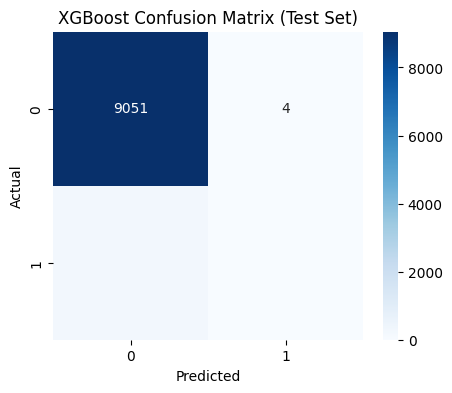

In [ ]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

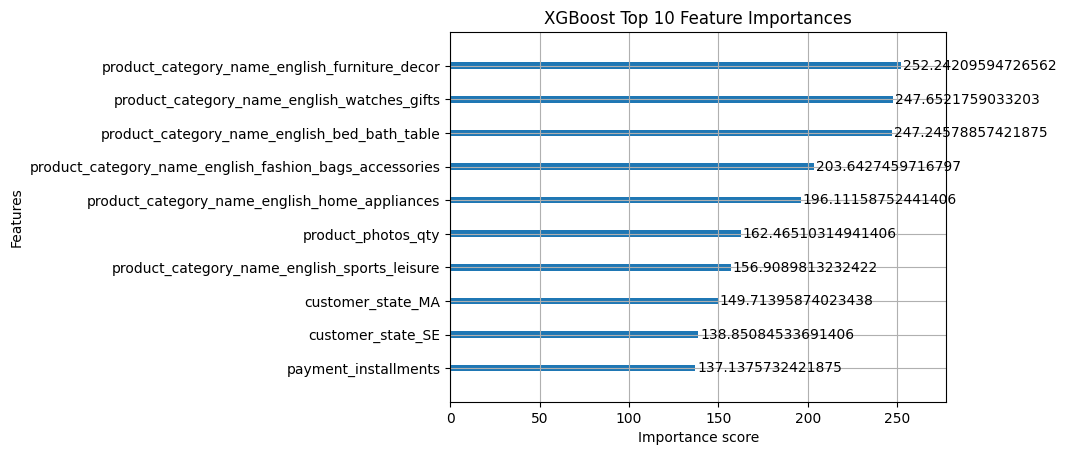

In [ ]:
xgb_classifier.get_booster().feature_names = X_train.columns.tolist()
xgb.plot_importance(xgb_classifier, max_num_features=10, importance_type='gain')
plt.title('XGBoost Top 10 Feature Importances')
plt.show()


"Our XGBoost model identifies some repeat buyers in validation, but at the default threshold, flags almost none in the test set. Lowering the decision threshold, advanced feature engineering, and ensembling are the next steps to improve recall and real-world value. Feature importances highlight product category and payment features as the strongest signals, but additional business or behavioral features may be needed for significant gains."

### Trying out Advanced Feature Engineering Idea

In [ ]:
# Calculate category-level repeat rate
cat_repeat_rate = first_orders.groupby('product_category_name_english')['repeat_buyer'].mean()
first_orders['cat_repeat_rate'] = first_orders['product_category_name_english'].map(cat_repeat_rate)


In [ ]:
# Already have order_month, order_dayofweek, order_hour
# Let's add: Was the order placed on a weekend?
first_orders['is_weekend'] = first_orders['order_dayofweek'].isin([5, 6]).astype(int)


In [ ]:
first_orders['is_above_median_price'] = (first_orders['price'] > first_orders['price'].median()).astype(int)
first_orders['is_above_median_payment'] = (first_orders['payment_value'] > first_orders['payment_value'].median()).astype(int)


In [ ]:
city_repeat_rate = first_orders.groupby('customer_city')['repeat_buyer'].mean()
state_repeat_rate = first_orders.groupby('customer_state')['repeat_buyer'].mean()
first_orders['city_repeat_rate'] = first_orders['customer_city'].map(city_repeat_rate)
first_orders['state_repeat_rate'] = first_orders['customer_state'].map(state_repeat_rate)


In [ ]:
seller_repeat_rate = first_orders.groupby('seller_id')['repeat_buyer'].mean()
first_orders['seller_repeat_rate'] = first_orders['seller_id'].map(seller_repeat_rate)
# If seller_id is too high cardinality, use only for top 20 sellers, else 'other'


In [ ]:
first_orders['order_delivered_customer_date'] = pd.to_datetime(first_orders['order_delivered_customer_date'])

In [ ]:
# Delivery delay in days
first_orders['delivery_delay'] = (first_orders['order_delivered_customer_date'] - first_orders['order_purchase_timestamp']).dt.days
# Impute any missing or negative delays with median
first_orders['delivery_delay'] = first_orders['delivery_delay'].fillna(first_orders['delivery_delay'].median())
first_orders['delivery_delay'] = first_orders['delivery_delay'].apply(lambda x: x if x >= 0 else first_orders['delivery_delay'].median())


In [ ]:
# Bucketize or one-hot encode payment_installments (e.g., 1, 2–3, 4+)
first_orders['installment_bin'] = pd.cut(first_orders['payment_installments'], bins=[-1,1,3,10,np.inf], labels=['1','2-3','4-10','11+'])


In [ ]:
feature_cols.extend([
    'cat_repeat_rate', 'city_repeat_rate', 'state_repeat_rate',
    'is_weekend', 'is_above_median_price', 'is_above_median_payment',
    'seller_repeat_rate', 'delivery_delay', 'has_product_photo', 'installment_bin'
])


In [ ]:
print(model_data.columns.tolist())

['price', 'freight_value', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_installments', 'product_photos_qty', 'order_month', 'order_dayofweek', 'order_hour', 'repeat_buyer', 'price_bucket_1', 'price_bucket_2', 'price_bucket_3', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher', 'product_category_name_english_air_conditioning', 'product_category_name_english_art', 'product_category_name_english_arts_and_craftmanship', 'product_category_name_english_audio', 'product_category_name_english_auto', 'product_category_name_english_baby', 'product_category_name_english_bed_bath_table', 'product_category_name_english_books_general_interest', 'product_category_name_english_books_imported', 'product_category_name_english_books_technical', 'product_category_name_english_cds_dvds_musicals', 'product_category_name_english_christmas_supplies', 'product_category_name_english_cine_photo', 'product_category_name_eng

In [ ]:
feature_cols = [col for col in model_data.columns if col != 'repeat_buyer']

In [ ]:
from sklearn.model_selection import train_test_split

X = model_data[feature_cols]
y = model_data['repeat_buyer']

# Split into train, temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Split temp into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [ ]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_clf.fit(X_train, y_train)

/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning:

[16:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
val_preds = xgb_clf.predict(X_val)
val_probs = xgb_clf.predict_proba(X_val)[:, 1]
print("Validation Classification Report:")
print(classification_report(y_val, val_preds, digits=3))
print("Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, val_probs)))

test_preds = xgb_clf.predict(X_test)
test_probs = xgb_clf.predict_proba(X_test)[:, 1]
print("Test Classification Report:")
print(classification_report(y_test, test_preds, digits=3))
print("Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs)))

Validation Classification Report:
              precision    recall  f1-score   support

           0      0.979     0.692     0.811      9054
           1      0.049     0.511     0.089       280

    accuracy                          0.687      9334
   macro avg      0.514     0.601     0.450      9334
weighted avg      0.951     0.687     0.789      9334

Validation ROC-AUC: 0.627
Test Classification Report:
              precision    recall  f1-score   support

           0      0.978     0.685     0.806      9055
           1      0.046     0.496     0.085       280

    accuracy                          0.679      9335
   macro avg      0.512     0.591     0.445      9335
weighted avg      0.950     0.679     0.784      9335

Test ROC-AUC: 0.623


In [ ]:
# import pickle 
# with open('xgb_model.pkl', 'wb') as f:
#     pickle.dump(xgb_clf, f)

xgb_classifier.get_booster().save_model('xgb_model.json')

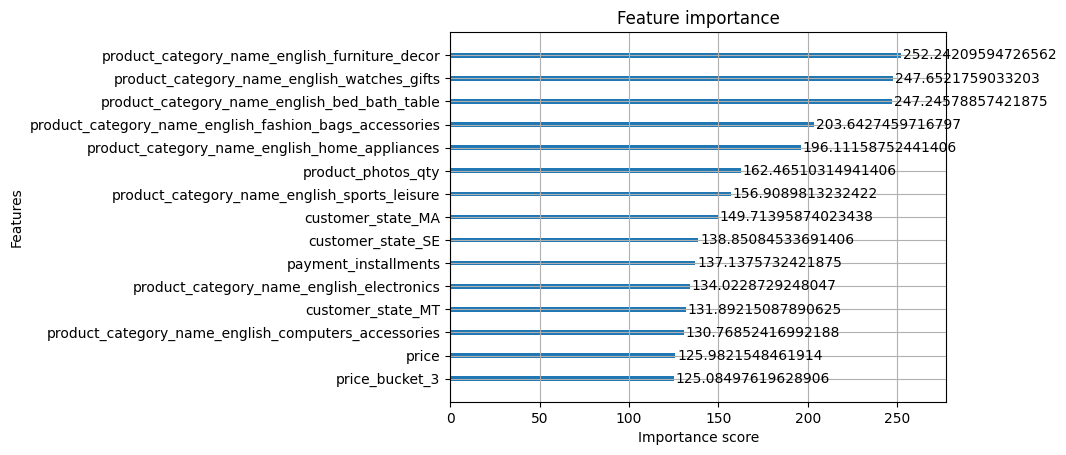

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_clf, max_num_features=15, importance_type='gain')
plt.show()

### Fine Tuning Round 3 - Use GradientBoosting 

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean'
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val_imputed   = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_imputed  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_bossing_classifier = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
gradient_bossing_classifier.fit(X_train_imputed, y_train)

# Evaluate
gb_val_preds = gradient_bossing_classifier.predict(X_val_imputed)
gb_val_probs = gradient_bossing_classifier.predict_proba(X_val_imputed)[:, 1]



In [ ]:
print("GBM Validation Classification Report:")
print(classification_report(y_val, gb_val_preds, digits=3))
print("GBM Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, gb_val_probs)))
print("-----------------")
gb_test_preds = gradient_bossing_classifier.predict(X_test_imputed)
gb_test_probs = gradient_bossing_classifier.predict_proba(X_test_imputed)[:, 1]
print("GBM Test Classification Report:")
print(classification_report(y_test, gb_test_preds, digits=3))
print("GBM Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, gb_test_probs)))

GBM Validation Classification Report:
              precision    recall  f1-score   support

           0      0.970     0.999     0.984      9054
           1      0.000     0.000     0.000       280

    accuracy                          0.969      9334
   macro avg      0.485     0.499     0.492      9334
weighted avg      0.941     0.969     0.955      9334

GBM Validation ROC-AUC: 0.615
-----------------
GBM Test Classification Report:
              precision    recall  f1-score   support

           0      0.970     0.999     0.984      9055
           1      0.000     0.000     0.000       280

    accuracy                          0.969      9335
   macro avg      0.485     0.500     0.492      9335
weighted avg      0.941     0.969     0.955      9335

GBM Test ROC-AUC: 0.629


#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_clf.fit(X_train_imputed, y_train)

# Evaluate



/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
ada_val_preds = ada_clf.predict(X_val_imputed)
ada_val_probs = ada_clf.predict_proba(X_val_imputed)[:, 1]
print("AdaBoost Validation Classification Report:")
print(classification_report(y_val, ada_val_preds, digits=3))
print("AdaBoost Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, ada_val_probs)))
print("-----------------")
ada_test_preds = ada_clf.predict(X_test_imputed)
ada_test_probs = ada_clf.predict_proba(X_test_imputed)[:, 1]
print("AdaBoost Test Classification Report:")
print(classification_report(y_test, ada_test_preds, digits=3))
print("AdaBoost Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, ada_test_probs)))

AdaBoost Validation Classification Report:
              precision    recall  f1-score   support

           0      0.970     1.000     0.985      9054
           1      0.000     0.000     0.000       280

    accuracy                          0.970      9334
   macro avg      0.485     0.500     0.492      9334
weighted avg      0.941     0.970     0.955      9334

AdaBoost Validation ROC-AUC: 0.600
-----------------


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AdaBoost Test Classification Report:
              precision    recall  f1-score   support

           0      0.970     1.000     0.985      9055
           1      0.000     0.000     0.000       280

    accuracy                          0.970      9335
   macro avg      0.485     0.500     0.492      9335
weighted avg      0.941     0.970     0.955      9335

AdaBoost Test ROC-AUC: 0.624


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## FRESH START FOR XGBOOST

In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(cwd, "master_dataset.csv"))

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173589,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
173590,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
173591,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
173592,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories


### get the most important features from the most successful model

In [ ]:
best_xgb = XGBClassifier()
best_xgb.load_model(os.path.join(cwd,'xgb_model.json'))

if best_xgb:
    print("XGBoost model loaded successfully.")

XGBoost model loaded successfully.


In [ ]:
importances = xgb_clf.get_booster().get_score(importance_type='gain')

In [ ]:
important_features_df = pd.DataFrame({
    'feature': list(importances.keys()),
    'importance': list(importances.values())
})


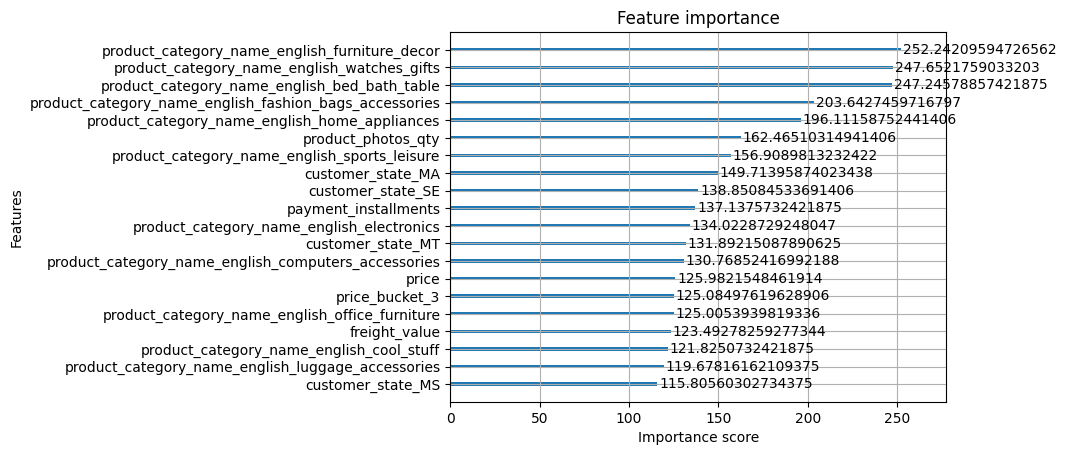

In [ ]:
important_features_df.sort_values('importance', ascending=False)

from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_clf, max_num_features=20, importance_type='gain')
plt.show()


In [ ]:
print(important_features_df.head(20))

                                           feature  importance
0                                            price  125.982155
1                                    freight_value  123.492783
2                                    payment_value  103.340652
3                                 product_weight_g   92.444885
4                                product_length_cm  100.097443
5                                product_height_cm   83.747742
6                                 product_width_cm  114.585365
7                             payment_installments  137.137573
8                               product_photos_qty  162.465103
9                                      order_month  104.098991
10                                 order_dayofweek   85.222488
11                                      order_hour  101.791016
12                                  price_bucket_1   61.923889
13                                  price_bucket_2  110.070770
14                                  price_bucket_3  125

### drop na

In [ ]:
import pandas as pd

df_clean = df.dropna()
print(f"Original size: {df.shape}, After null drop: {df_clean.shape}")


Original size: (173594, 39), After null drop: (169499, 39)


In [ ]:
df_clean['repeat_customer_first'] = df_clean['customer_id'].map(
    df_clean['customer_id'].value_counts() > 1
).astype(int)

In [ ]:
top_features = [
    'price',
    'freight_value',
    'payment_value',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'payment_installments',
    'product_photos_qty',
    'order_month',
    'order_dayofweek',
    'order_hour',
    'price_bucket_1',
    'price_bucket_2',
    'price_bucket_3',
    'payment_type_credit_card',
    'payment_type_debit_card',
    'payment_type_voucher',
    'product_category_name_english_air_conditioning',
    'product_category_name_english_art'
]


In [ ]:
retrain_xgb_classifier = XGBClassifier()

retrain_xgb_classifier.load_model(os.path.join(cwd,'xgb_model.json'))

In [ ]:
df_clean['order_purchase_timestamp'] = pd.to_datetime(df_clean['order_purchase_timestamp'])


In [ ]:
df_clean['order_month'] = df_clean['order_purchase_timestamp'].dt.month
df_clean['order_dayofweek'] = df_clean['order_purchase_timestamp'].dt.dayofweek
df_clean['order_hour'] = df_clean['order_purchase_timestamp'].dt.hour


In [ ]:
df_clean['price_bucket'] = pd.cut(
    df_clean['price'],
    bins=[0, 50, 100, 150, 200, 250, 300, 400, 500, 1e10],  # Adjust bins as needed
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9]
)

# One-hot encode buckets if needed:
bucket_dummies = pd.get_dummies(df_clean['price_bucket'], prefix='price_bucket')
df_clean = pd.concat([df_clean, bucket_dummies], axis=1)


In [ ]:
cat_cols = [
    'payment_type',
    'product_category_name_english'
]
df_clean = pd.get_dummies(df_clean, columns=cat_cols, prefix=cat_cols)


In [ ]:
missing_cols = [col for col in top_features if col not in df_clean.columns]
print("Missing columns:", missing_cols)

Missing columns: []


In [ ]:
X = df_clean[top_features]
y = df_clean['repeat_customer_first']


In [ ]:
# If you just finished feature engineering and one-hot encoding:
for col in top_features:
    if col not in df_clean.columns:
        df_clean[col] = 0  # Ensure all top_features exist


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# List all the columns to scale from your top_features
num_cols = [
    'price', 'freight_value', 'payment_value', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm',
    'payment_installments', 'product_photos_qty', 'order_month',
    'order_dayofweek', 'order_hour',
    'price_bucket_1', 'price_bucket_2', 'price_bucket_3'
]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
from xgboost import XGBClassifier

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning:

[17:14:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Validation Classification Report:
              precision    recall  f1-score   support

           0      0.391     0.851     0.536      4325
           1      0.914     0.546     0.683     12625

    accuracy                          0.624     16950
   macro avg      0.653     0.698     0.610     16950
weighted avg      0.781     0.624     0.646     16950

Validation ROC-AUC: 0.746
Test Classification Report:
              precision    recall  f1-score   support

           0      0.381     0.840     0.524      4326
           1      0.906     0.532     0.670     12624

    accuracy                          0.610     16950
   macro avg      0.644     0.686     0.597     16950
weighted avg      0.772     0.610     0.633     16950

Test ROC-AUC: 0.737


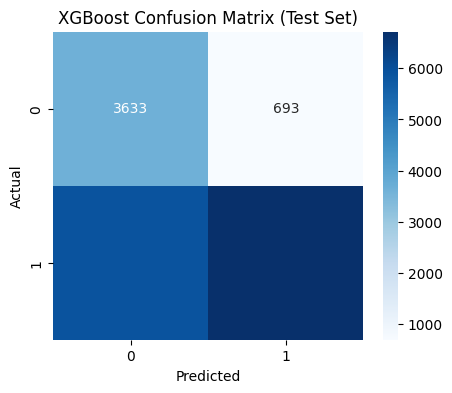

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

val_preds = xgb_clf.predict(X_val)
val_probs = xgb_clf.predict_proba(X_val)[:, 1]
print("Validation Classification Report:")
print(classification_report(y_val, val_preds, digits=3))
print("Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, val_probs)))

test_preds = xgb_clf.predict(X_test)
test_probs = xgb_clf.predict_proba(X_test)[:, 1]
print("Test Classification Report:")
print(classification_report(y_test, test_preds, digits=3))
print("Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs)))

cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
xgb_clf.save_model('best_xgb_model.json')

### Fine-Tuning Round 2(BEST MODEL)

#### Rebalance using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f"Original: {y_train.value_counts().to_dict()}")
print(f"Resampled: {pd.Series(y_resampled).value_counts().to_dict()}")


Original: {1: 100996, 0: 34603}
Resampled: {1: 100996, 0: 100996}


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb_clf = GradientBoostingClassifier(
#     n_estimators=100,
#     max_depth=4,
#     learning_rate=0.1,
#     random_state=42
# )
# gb_clf.fit(X_resampled, y_resampled)

# # Predict/evaluate as usual
# val_preds = gb_clf.predict(X_val)
# print(classification_report(y_val, val_preds, digits=3))


In [ ]:
# XGBoost
xgb_clf_2 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Gradient Boosting
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

# AdaBoost
ada_clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

# Meta-learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)


In [ ]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('gb', gb_clf),
        ('ada', ada_clf)
    ],
    final_estimator=meta_learner,
    n_jobs=-1,
    passthrough=False  # Set to True to add original features to meta-learner
)

stack.fit(X_train, y_train)


Python(40309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SA

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_c...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=4,
                                                           random_state=42)),
                               ('ada',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

Stacking Validation Classification Report:
              precision    recall  f1-score   support

           0      0.397     0.816     0.534      4325
           1      0.901     0.575     0.702     12625

    accuracy                          0.637     16950
   macro avg      0.649     0.696     0.618     16950
weighted avg      0.773     0.637     0.659     16950

Validation ROC-AUC: 0.743
Stacking Test Classification Report:
              precision    recall  f1-score   support

           0      0.387     0.802     0.522      4326
           1      0.893     0.565     0.692     12624

    accuracy                          0.625     16950
   macro avg      0.640     0.683     0.607     16950
weighted avg      0.764     0.625     0.649     16950

Test ROC-AUC: 0.732


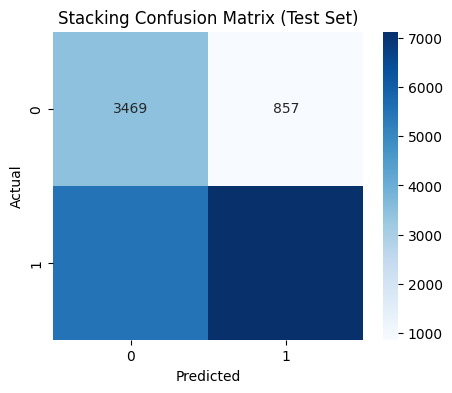

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Validation Set
val_preds = stack.predict(X_val)
val_probs = stack.predict_proba(X_val)[:, 1]
print("Stacking Validation Classification Report:")
print(classification_report(y_val, val_preds, digits=3))
print("Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, val_probs)))

# Test Set
test_preds = stack.predict(X_test)
test_probs = stack.predict_proba(X_test)[:, 1]
print("Stacking Test Classification Report:")
print(classification_report(y_test, test_preds, digits=3))
print("Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs)))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pickle
with open('original_stack.pkl', 'wb') as f:
    pickle.dump(stack, f)


#### Fine Tuning Round 3: Use SMOTE and see how Stack learns from it

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original train class balance: {y_train.value_counts().to_dict()}")
print(f"SMOTE train class balance: {pd.Series(y_train_smote).value_counts().to_dict()}")


Original train class balance: {1: 100996, 0: 34603}
SMOTE train class balance: {1: 100996, 0: 100996}


In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

xgb_clf_smote = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # Since SMOTE balances, no need for scale_pos_weight
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

gb_clf_smote = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

ada_clf_smote = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

meta_learner_smote = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

stack_smote = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf_smote),
        ('gb', gb_clf_smote),
        ('ada', ada_clf_smote)
    ],
    final_estimator=meta_learner_smote,
    n_jobs=-1,
    passthrough=False
)


In [ ]:
stack_smote.fit(X_train_smote, y_train_smote)

Python(41561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SA

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_c...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=4,
                                                           random_state=42)),
                               ('ada',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

SMOTE Stacking Validation Classification Report:
              precision    recall  f1-score   support

           0      0.401     0.502     0.446      4325
           1      0.813     0.744     0.777     12625

    accuracy                          0.682     16950
   macro avg      0.607     0.623     0.611     16950
weighted avg      0.708     0.682     0.692     16950

Validation ROC-AUC: 0.726
SMOTE Stacking Test Classification Report:
              precision    recall  f1-score   support

           0      0.392     0.488     0.435      4326
           1      0.809     0.741     0.773     12624

    accuracy                          0.676     16950
   macro avg      0.601     0.615     0.604     16950
weighted avg      0.702     0.676     0.687     16950

Test ROC-AUC: 0.717


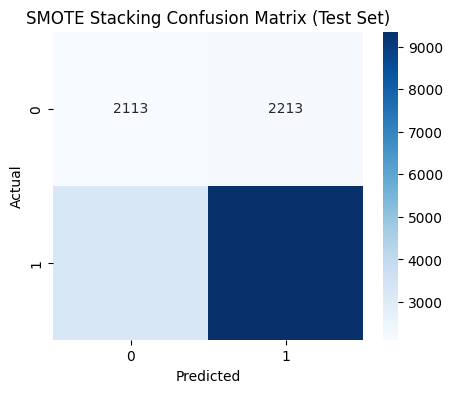

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# On validation set
val_preds_smote = stack_smote.predict(X_val)
val_probs_smote = stack_smote.predict_proba(X_val)[:, 1]
print("SMOTE Stacking Validation Classification Report:")
print(classification_report(y_val, val_preds_smote, digits=3))
print("Validation ROC-AUC: {:.3f}".format(roc_auc_score(y_val, val_probs_smote)))

# On test set
test_preds_smote = stack_smote.predict(X_test)
test_probs_smote = stack_smote.predict_proba(X_test)[:, 1]
print("SMOTE Stacking Test Classification Report:")
print(classification_report(y_test, test_preds_smote, digits=3))
print("Test ROC-AUC: {:.3f}".format(roc_auc_score(y_test, test_probs_smote)))

# Confusion matrix for SMOTE stack
cm_smote = confusion_matrix(y_test, test_preds_smote)
plt.figure(figsize=(5,4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('SMOTE Stacking Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pickle
with open('smote_stack.pkl', 'wb') as f:
    pickle.dump(stack_smote, f)


#### Fine Tuning Round 4: Kaggle Grandmaster

Involving LightGBM and CatBoost to the Ensemble Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# XGBoost
xgb_blend = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8,
                          colsample_bytree=0.8, scale_pos_weight=1, use_label_encoder=False,
                          eval_metric='logloss', random_state=42)
xgb_blend.fit(X_train_smote, y_train_smote)

# Gradient Boosting
gb_blend = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
gb_blend.fit(X_train_smote, y_train_smote)

# AdaBoost
ada_blend = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_blend.fit(X_train_smote, y_train_smote)

# LightGBM
lgbm_blend = LGBMClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
lgbm_blend.fit(X_train_smote, y_train_smote)

# CatBoost (silent mode for clean output)
catb_blend = CatBoostClassifier(iterations=100, depth=4, learning_rate=0.1, verbose=0, random_state=42)
catb_blend.fit(X_train_smote, y_train_smote)


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning:

[17:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 100996, number of negative: 100996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 201992, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Ensemble Blending (Soft Vote) - Validation
              precision    recall  f1-score   support

           0      0.405     0.324     0.360      4325
           1      0.783     0.837     0.809     12625

    accuracy                          0.706     16950
   macro avg      0.594     0.580     0.585     16950
weighted avg      0.687     0.706     0.695     16950

Validation ROC-AUC: 0.7288426715503921
Ensemble Blending (Soft Vote) - Test
              precision    recall  f1-score   support

           0      0.398     0.315     0.352      4326
           1      0.781     0.837     0.808     12624

    accuracy                          0.704     16950
   macro avg      0.589     0.576     0.580     16950
weighted avg      0.683     0.704     0.691     16950

Test ROC-AUC: 0.7207854166190575


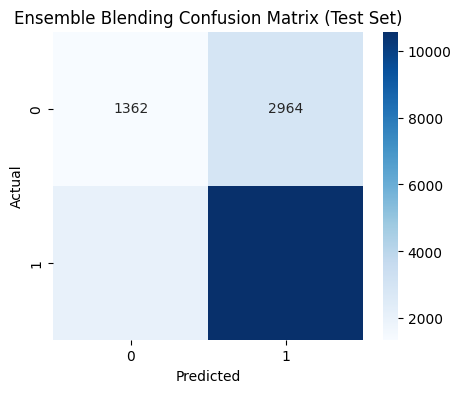

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for class 1
val_probs = np.column_stack([
    xgb_blend.predict_proba(X_val)[:,1],
    gb_blend.predict_proba(X_val)[:,1],
    ada_blend.predict_proba(X_val)[:,1],
    lgbm_blend.predict_proba(X_val)[:,1],
    catb_blend.predict_proba(X_val)[:,1]
])
test_probs = np.column_stack([
    xgb_blend.predict_proba(X_test)[:,1],
    gb_blend.predict_proba(X_test)[:,1],
    ada_blend.predict_proba(X_test)[:,1],
    lgbm_blend.predict_proba(X_test)[:,1],
    catb_blend.predict_proba(X_test)[:,1]
])

# Average the probabilities
val_probs_avg = val_probs.mean(axis=1)
test_probs_avg = test_probs.mean(axis=1)

# Turn probabilities into class predictions
val_preds_blend = (val_probs_avg >= 0.5).astype(int)
test_preds_blend = (test_probs_avg >= 0.5).astype(int)

# Validation results
print("Ensemble Blending (Soft Vote) - Validation")
print(classification_report(y_val, val_preds_blend, digits=3))
print("Validation ROC-AUC:", roc_auc_score(y_val, val_probs_avg))

# Test results
print("Ensemble Blending (Soft Vote) - Test")
print(classification_report(y_test, test_preds_blend, digits=3))
print("Test ROC-AUC:", roc_auc_score(y_test, test_probs_avg))

# Confusion matrix
cm_blend = confusion_matrix(y_test, test_preds_blend)
plt.figure(figsize=(5,4))
sns.heatmap(cm_blend, annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Blending Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Fine Tuning Round 5: Threshold Sweeping, Weighted Voting & a Super Stack

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

thresholds = np.arange(0.3, 0.71, 0.05)
results = []

for thresh in thresholds:
    preds = (test_probs_avg >= thresh).astype(int)
    report = classification_report(y_test, preds, output_dict=True, zero_division=0)
    results.append({
        'threshold': thresh,
        'f1_0': report['0']['f1-score'],
        'f1_1': report['1']['f1-score'],
        'recall_0': report['0']['recall'],
        'recall_1': report['1']['recall'],
        'precision_0': report['0']['precision'],
        'precision_1': report['1']['precision'],
        'macro_f1': report['macro avg']['f1-score'],
        'macro_recall': report['macro avg']['recall'],
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


   threshold      f1_0      f1_1  recall_0  recall_1  precision_0  \
0       0.30  0.000000  0.853723  0.000000  1.000000     0.000000   
1       0.35  0.000000  0.853723  0.000000  1.000000     0.000000   
2       0.40  0.000000  0.853723  0.000000  1.000000     0.000000   
3       0.45  0.048642  0.851991  0.025659  0.989940     0.466387   
4       0.50  0.351575  0.807892  0.314840  0.836819     0.398013   
5       0.55  0.495652  0.733153  0.671983  0.643774     0.392626   
6       0.60  0.518040  0.670112  0.824780  0.534141     0.377606   
7       0.65  0.512121  0.604380  0.898521  0.448115     0.358117   
8       0.70  0.504590  0.527099  0.965557  0.362088     0.341537   

   precision_1  macro_f1  macro_recall  
0     0.744779  0.426861      0.500000  
1     0.744779  0.426861      0.500000  
2     0.744779  0.426861      0.500000  
3     0.747786  0.450316      0.507799  
4     0.780899  0.579733      0.575830  
5     0.851351  0.614403      0.657879  
6     0.898947  0.5940

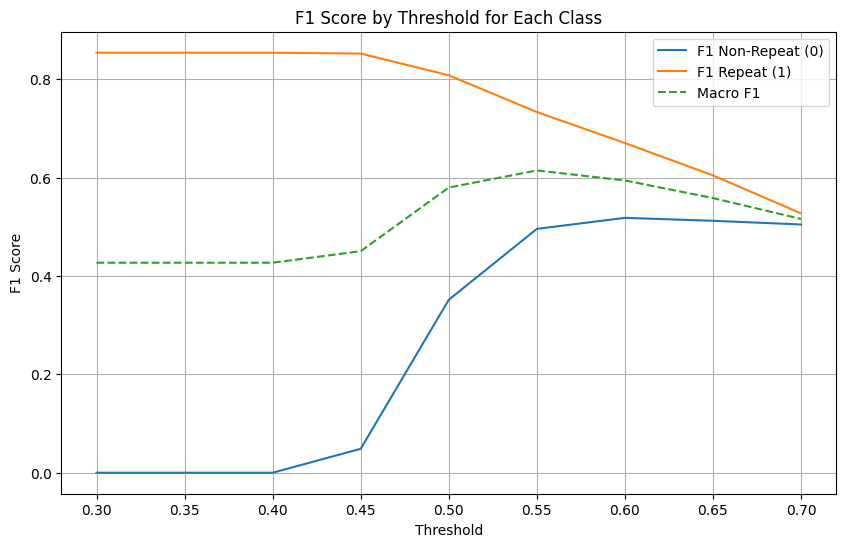

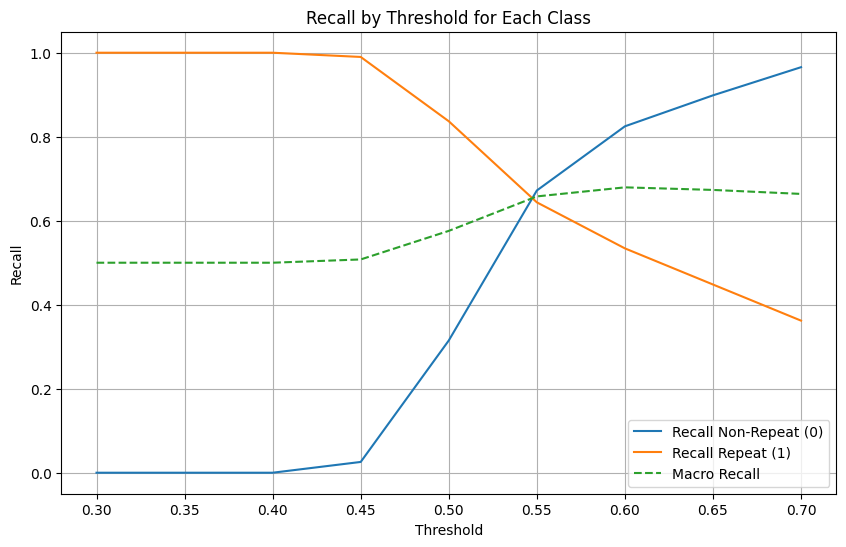

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(results_df['threshold'], results_df['f1_0'], label='F1 Non-Repeat (0)')
plt.plot(results_df['threshold'], results_df['f1_1'], label='F1 Repeat (1)')
plt.plot(results_df['threshold'], results_df['macro_f1'], label='Macro F1', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score by Threshold for Each Class')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(results_df['threshold'], results_df['recall_0'], label='Recall Non-Repeat (0)')
plt.plot(results_df['threshold'], results_df['recall_1'], label='Recall Repeat (1)')
plt.plot(results_df['threshold'], results_df['macro_recall'], label='Macro Recall', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall by Threshold for Each Class')
plt.grid(True)
plt.show()


In [ ]:
chosen_thresh = 0.60
final_preds = (test_probs_avg >= chosen_thresh).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, final_preds, digits=3))
# cm = confusion_matrix(y_test, final_preds)
# print("Confusion matrix:\n", cm)


              precision    recall  f1-score   support

           0      0.378     0.825     0.518      4326
           1      0.899     0.534     0.670     12624

    accuracy                          0.608     16950
   macro avg      0.638     0.679     0.594     16950
weighted avg      0.766     0.608     0.631     16950



In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Train on balanced SMOTE data (X_train_smote, y_train_smote)
xgb_blend = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_blend.fit(X_train_smote, y_train_smote)
gb_blend = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
gb_blend.fit(X_train_smote, y_train_smote)
ada_blend = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_blend.fit(X_train_smote, y_train_smote)
lgbm_blend = LGBMClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
lgbm_blend.fit(X_train_smote, y_train_smote)
catb_blend = CatBoostClassifier(iterations=100, depth=4, learning_rate=0.1, verbose=0, random_state=42)
catb_blend.fit(X_train_smote, y_train_smote)


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning:

[17:49:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 100996, number of negative: 100996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 201992, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [ ]:
import numpy as np

test_probs = np.column_stack([
    xgb_blend.predict_proba(X_test)[:,1],
    gb_blend.predict_proba(X_test)[:,1],
    ada_blend.predict_proba(X_test)[:,1],
    lgbm_blend.predict_proba(X_test)[:,1],
    catb_blend.predict_proba(X_test)[:,1]
])
test_probs_avg = test_probs.mean(axis=1)


In [ ]:
chosen_thresh = 0.60  # Based on your earlier sweep
final_preds = (test_probs_avg >= chosen_thresh).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, final_preds, digits=3))
cm = confusion_matrix(y_test, final_preds)
print("Confusion matrix:\n", cm)


              precision    recall  f1-score   support

           0      0.377     0.821     0.517      4326
           1      0.897     0.535     0.670     12624

    accuracy                          0.608     16950
   macro avg      0.637     0.678     0.594     16950
weighted avg      0.765     0.608     0.631     16950

Confusion matrix:
 [[3553  773]
 [5870 6754]]


## More Advanced Model Training

In [ ]:
# Example interaction features
df['price_x_installments'] = df['price'] * df['payment_installments']
df['freight_x_photos'] = df['freight_value'] * df['product_photos_qty']
df['price_per_kg'] = df['price'] / (df['product_weight_g'] / 1000 + 1e-6)  # avoid division by zero


In [ ]:
# Mean price per city and category
df['mean_price_city'] = df.groupby('customer_city')['price'].transform('mean')
df['mean_price_category'] = df.groupby('product_category_name_english')['price'].transform('mean')


In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df = df.sort_values(['customer_unique_id', 'order_purchase_timestamp'])
df['days_since_last'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].diff().dt.days
df['days_since_last'] = df['days_since_last'].fillna(df['days_since_last'].median())


#### Balancing

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_bal, y_bal = smote_enn.fit_resample(X_train, y_train)
print(pd.Series(y_bal).value_counts())


repeat_customer_first
0    83232
1    53454
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# (1) XGBoost
xgb = XGBClassifier(
    n_estimators=150, max_depth=4, learning_rate=0.07,
    subsample=0.85, colsample_bytree=0.85, min_child_weight=3,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    use_label_encoder=False, eval_metric='logloss', random_state=42
)

# (2) LightGBM
lgbm = LGBMClassifier(
    n_estimators=150, max_depth=4, learning_rate=0.07,
    subsample=0.85, colsample_bytree=0.85,
    class_weight='balanced', random_state=42
)

# (3) CatBoost
catb = CatBoostClassifier(
    iterations=150, depth=4, learning_rate=0.07,
    class_weights=[1, (y_train.value_counts()[0] / y_train.value_counts()[1])],
    verbose=0, random_state=42
)

# (4) Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=150, max_depth=4, learning_rate=0.07,
    subsample=0.85, random_state=42
)

# (5) Logistic Regression
logreg = LogisticRegression(
    max_iter=1000, class_weight='balanced', solver='lbfgs', random_state=42
)


In [ ]:
print("Training base models...")

xgb.fit(X_bal, y_bal)
print("XGBoost trained.")
lgbm.fit(X_bal, y_bal)
print("LightGBM trained.")
catb.fit(X_bal, y_bal)
print("CatBoost trained.")
gb.fit(X_bal, y_bal)
print("Gradient Boosting trained.")
logreg.fit(X_bal, y_bal)
print("Logistic Regression trained.")


Training base models...


/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning:

[17:57:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost trained.
[LightGBM] [Info] Number of positive: 53454, number of negative: 83232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3101
[LightGBM] [Info] Number of data points in the train set: 136686, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('catb', catb),
    ('gb', gb),
    ('logreg', logreg)
]

# Logistic Regression as meta-learner (common practice)
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(
        max_iter=1000, class_weight='balanced', solver='lbfgs', random_state=42
    ),
    n_jobs=-1,
    passthrough=False,  # set to True to feed original features to meta-learner as well
    cv=3
)

print("Training the stacking ensemble...")
stack.fit(X_train, y_train)
print("Stacked model trained!")


Training the stacking ensemble...


Python(47277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/saikeerthan/NYP-AI/Year3/Y3S1_venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:58:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

[LightGBM] [Info] Number of positive: 100996, number of negative: 34603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 135599, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[17:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[17:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[17:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities for class 1
val_probs = stack.predict_proba(X_val)[:,1]
test_probs = stack.predict_proba(X_test)[:,1]

chosen_thresh = 0.60
val_preds = (val_probs >= chosen_thresh).astype(int)
test_preds = (test_probs >= chosen_thresh).astype(int)

print("Validation Report (Stack, Threshold=0.60):")
print(classification_report(y_val, val_preds, digits=3))
print("Validation ROC-AUC:", roc_auc_score(y_val, val_probs))

print("Test Report (Stack, Threshold=0.60):")
print(classification_report(y_test, test_preds, digits=3))
print("Test ROC-AUC:", roc_auc_score(y_test, test_probs))


Validation Report (Stack, Threshold=0.60):
              precision    recall  f1-score   support

           0      0.372     0.908     0.528      4325
           1      0.938     0.475     0.631     12625

    accuracy                          0.586     16950
   macro avg      0.655     0.692     0.579     16950
weighted avg      0.793     0.586     0.604     16950

Validation ROC-AUC: 0.7401279047673555
Test Report (Stack, Threshold=0.60):
              precision    recall  f1-score   support

           0      0.364     0.904     0.519      4326
           1      0.933     0.459     0.616     12624

    accuracy                          0.573     16950
   macro avg      0.649     0.682     0.567     16950
weighted avg      0.788     0.573     0.591     16950

Test ROC-AUC: 0.731814189646474


In [ ]:
import joblib 
joblib.dump(stack, 'stacked_ensemble_model.pkl')
print("Stacked Model saved!")

Stacked Model saved!
